<a href="https://colab.research.google.com/github/AliNikkhah2001/DeepLearning02/blob/main/DL_HW1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Define the personal information
first_name = "Ali"
last_name = "Nikkhah"
student_number = "99102445"

# Create the formatted card
info_card = f'''
╔════════════════════════════╗
║      Personal Info         ║
╠════════════════════════════╣
║ First Name:    {first_name: <12}║
║ Last Name:     {last_name: <12}║
║ Student Number:{student_number: <12}║
╚════════════════════════════╝
'''

# Print the card
print(info_card)



╔════════════════════════════╗
║      Personal Info         ║
╠════════════════════════════╣
║ First Name:    Ali         ║
║ Last Name:     Nikkhah     ║
║ Student Number:99102445    ║
╚════════════════════════════╝



### Decision tree

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
 الگوریتم ساخت درخت تصمیم به صورت زیر میباشد:
<ol>
<li>
یک ویژگی انتخاب می شود و داده‌ها بر اساس یک شرط روی آن ویژگی تقسیم می‌شوند. بهترین ویژگی، ویژگی‌ای است که داده‌ها را به بهترین شکل تقسیم می‌کند.
</font></div>

<div align=right>
<font face="B Nazanin" size=5>
<p></p>
<b><i>
 ID3 الگوریتم
</i></b>
</font></div>
<p></p>
<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در ادامه‌ی این نوشته به بررسی الگوریتم ID3 که یک الگوریتم پایه‌ای برای ساخت درخت تصمیم است می‌پردازیم.
<h3>بهره‌ی اطلاعاتی</h3>
 برای تعیین رسیدن به برگ‌های درخت نیاز به بررسی این موضوع داریم که آیا داده‌های یک گره به‌اندازه‌ی کافی یکدست شده‌اند یا خیر. در الگوریتم ID3 برای این کار از معیار بهره‌ی اطلاعاتی استفاده می‌شود.
برای تعریف بهره‌ی اطلاعاتی ابتدا انتروپی را تعریف می‌کنیم.
<br>
انتروپی یک معیار عددی برای اندازه‌گیری اطلاعات یا تصادفی بودن یک متغیر تصادفی است. این معیار به صورت زیر تعریف می‌شود:
</font></div>

$H(X) := -\sum_{x \in \mathcal{x}} P(x)\; logP(x) = \mathbb{E}[-logP(x)]$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
در مسئله‌ی دسته‌بندی دو کلاسه می‌توانیم احتمال انتساب داده به هر کلاس را با توزیع برنولی مدل کنیم. در این صورت خواهیم داشت:
</font></div>

$H(x):= -P_+\; logP_+ - P_-\; logP_-$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
نمودار زیر این تابع را بر حسب احتمال انتساب به ‌دسته‌ی مثبت نشان می‌دهد.
</font></div>

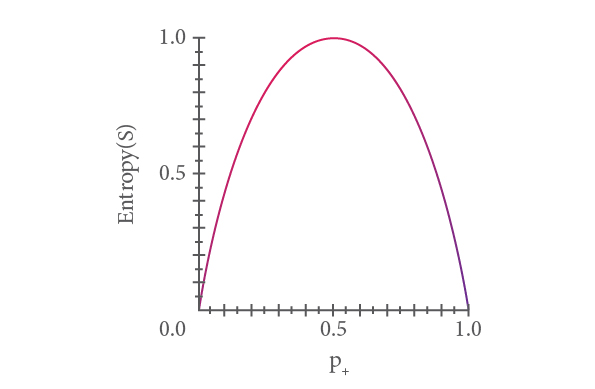

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
هر چه مقدار انتروپی بیشتر باشد ابهام درباره‌ی متغیر تصادفی بیشتر است. در مثال  بالا بیشینه‌ی انتروپی بازای مقدار احتمال ۰.۵ (مثلا یک سکه‌ی متوازن) رخ می‌دهد. هر چقدر به احتمال‌های ۰ یا ۱ نزدیک شویم (سکه نامتوازن‌تر شود) مقدار ابهام کم می‌شود.
<br>
بنابراین طبق آن‌چه گفته شد انتروپی به طور شهودی ابهام موجود در توزیع داده‌ها را به ما نشان‌ می‌دهد. از طرف دیگر اشاره شد که هنگام ساختن گره‌ها باید ویژگی‌ای انتخاب شود که دسته‌بندی داده‌ها براساس آن بیشترین یکدستی را در دسته‌های تولید شده، ایجاد کند. بنابراین یک معیار می‌تواند این باشد که این دسته‌بندی چقدر از انتروپی موجود در داده‌ها کاسته است. به این مقدار بهره‌ی اطلاعاتی گفته می‌شود.
</font></div>

$Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{S} Entropy(S_v)$

<div dir="rtl" style="text-align: justify"><font face="B Nazanin" size=4>
که در رابطه‌ی بالا S
مجموعه‌ی داده‌ها در گره قبل از تقسیم‌بندی است، A
ویژگی‌ای است که بر اساس آن داده‌ها تقسیم‌بندی می‌شوند.  Values(A)
مقادیر مختلفی است که ویژگی A
می‌تواند داشته باشد و
$S_v$
زیرمجموعه‌ای از S است که ویژگی A در آنها برابر با $v$ است.
<br>

**Libraries Import**

In [ ]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

import numpy as np
from sklearn.decomposition import PCA
import keras
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt


حال در زیر توابع لازم از جمله آنتروپی و بهره اطلاعاتی را تکمیل کنید.
از این توابع در تعریف کردن مدل یادگیری و انتخاب بهترین ویژگی استفاده خواهیم کرد.

<div dir=rtl>
حال در زیر کلاس Node  را تعریف میکنیم که  بیس اصلی مدل ما را تشکیل میدهد .

با استفاده از توابعی که در قسمت قبل نوشتید مدل یادگیری خود را کامل کنید.

In [ ]:
def entropy(y: pd.Series):
    """
    Calculate and return the entropy of the input labels.
    """
    elements,counts = np.unique(y,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
def information_gain(x: pd.Series, y: pd.Series):
    combined_data = pd.concat([x, y], axis=1)
    entropy_parent = entropy(y)
    Weighted_Entropy=0
    for value in x.unique():
        subset = combined_data[x == value][y.name]
        Weighted_Entropy -= (len(subset) / len(y)) * entropy(subset)
    info_gain = entropy_parent - Weighted_Entropy
    return info_gain
def information_gains(X: pd.DataFrame, y: pd.Series):
    """
    Calculate information gains for all features in the dataset.
    Returns a Series with feature names as the index and information gains as values.
    """
    if X.empty or y.empty:
        raise ValueError("Input data is empty.")

    info_gains = {}
    for feature in X.columns:
        info_gains[feature] = information_gain(X[feature], y)
    return pd.Series(info_gains)



In [ ]:
class Node:
    def __init__(self, depth, max_depth):
        self.depth = depth
        self.max_depth = max_depth
        self.best_feature = None
        self.children = {}  # Use a dictionary to store children
        self.choice = None  # New attribute to handle leaf nodes

    def fit(self, X_train, y_train):
        if self.depth == self.max_depth or len(set(y_train)) == 1 :
            self.choice = y_train.mode()[0]
        else:
            info_gains = information_gains(X_train, y_train)

            # Filter out features with trivial classification
            non_trivial_features = [feature for feature in info_gains.index if len(set(X_train[feature])) > 1]

            if non_trivial_features:
                self.best_feature = info_gains[non_trivial_features].idxmax()

                # Split based on pixel intensity
                unique_values = np.unique(X_train[self.best_feature])

                for value in unique_values:
                    child_X = X_train[X_train[self.best_feature] == value]
                    child_y = y_train[X_train[self.best_feature] == value]
                    if not child_X.empty:
                        child = Node(depth=self.depth + 1, max_depth=self.max_depth)
                        self.children[value] = child
                        # Remove the chosen feature for recursion
                        child.fit(child_X.drop(self.best_feature, axis=1), child_y)
            else:
                # If there are no non-trivial features, make a leaf node
                self.choice = y_train.mode()[0]

    def predict(self, X):
        if self.choice is not None:
            return self.choice
        else:
            value = X[self.best_feature]
            if value in self.children:
                return self.children[value].predict(X)

    def __str__(self):
        indent = "  " * self.depth
        result = f"{indent}Depth {self.depth}: Best Feature = {self.best_feature}, Choice = {self.choice}\n"
        for value, child in self.children.items():
            result += f"{indent}  Value: {value}\n"
            result += str(child)  # Recursively call __str__ for children
        return result


###Training & Testing

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml



N = 100
    # Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
pd.DataFrame(mnist.data).describe()
    # Extract the features and target
X = mnist.data
y = mnist.target



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Find the minimum and maximum values in the dataset
min_value = X.min().min()
max_value = X.max().max()


    # Scale the values to the range [0, 10) integers
X_scaled = ((X - min_value) / (max_value - min_value) * 10).astype(int)

    # Create a new DataFrame with the scaled values
mnist_scaled = pd.DataFrame(X_scaled)
pd.DataFrame(mnist_scaled).describe()
    # Print the value ranges and the scaled dataset
print(f"Original Value Range: {min_value:.2f} to {max_value:.2f}")
print(f"Scaled Value Range: {X_scaled.min().min()} to {X_scaled.max().max()}")

non_zero_indices = X_scaled[X_scaled.sum(axis=1) != 0].index
X_sampled = X_scaled.loc[non_zero_indices]
y_sampled = y.loc[non_zero_indices]



Original Value Range: 0.00 to 255.00
Scaled Value Range: 0 to 10


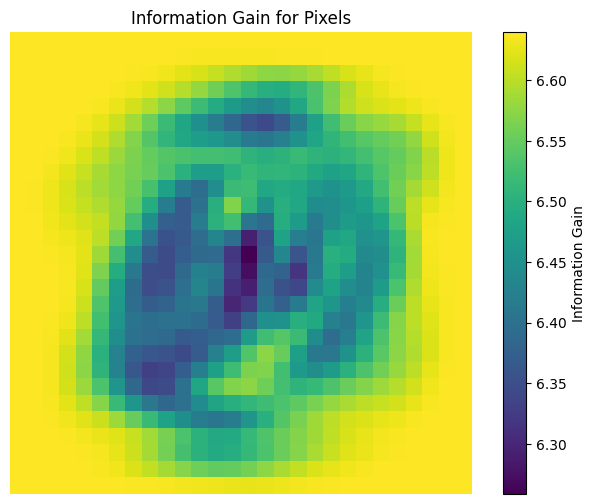

In [ ]:
info_gains=information_gains(pd.DataFrame(X_scaled), pd.Series(y))
pd.DataFrame(info_gains).describe()
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'info_gains' is your 1D Series of information gains
# Reshape it into a 2D array (28x28 for MNIST-like data)
info_gain_array = info_gains.values.reshape(28, 28)

# Create a heatmap to visualize the information gain
plt.figure(figsize=(8, 6))
plt.imshow(info_gain_array, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Information Gain')
plt.title('Information Gain for Pixels')
plt.axis('off')  # Optional: Remove axis labels

# Show the plot
plt.show()


In [ ]:
pd.DataFrame(info_gains).describe()

,0
count,784.000000
mean,6.551592
std,0.093900
min,6.258547
25%,6.486057
50%,6.585692
75%,6.637462
max,6.639674


When you encounter a situation where the information gain for many features is the same throughout the dataset, it can pose a challenge for decision tree algorithms like ID3, as it may lead to the algorithm selecting features somewhat arbitrarily. To address this issue, you can consider the following approaches:

Feature Selection: One common approach is to perform feature selection to reduce the dimensionality of the dataset. This can involve techniques like Principal Component Analysis (PCA) or feature ranking based on their individual importance. By reducing the number of features, you may make it easier for the decision tree algorithm to find more discriminative features.
Feature Engineering: If the features are highly correlated, you might consider creating new features that capture different aspects of the data. This can help the algorithm find more information to split on. Feature engineering can be a creative process and may require domain knowledge.
Ensemble Methods: Instead of relying on a single decision tree, consider using ensemble methods like Random Forest or Gradient Boosting. These methods combine the predictions of multiple decision trees, which can help overcome the limitations of individual trees.
Pruning the Tree: If you're using a tree-based algorithm, you can apply pruning techniques to limit the tree's depth or complexity. This can help avoid overfitting and improve generalization.
Balancing the Dataset: Ensure that the dataset is balanced, meaning that it has roughly equal representation of different classes. An imbalanced dataset can lead to biased decisions by the algorithm.
Alternative Algorithms: If the decision tree-based algorithms still struggle with the dataset, you can explore other machine learning algorithms that may be more suitable for the data distribution, such as neural networks or support vector machines.
Cross-Validation: Use cross-validation to evaluate the model's performance on different subsets of the data. This can help identify whether the algorithm's performance is consistent or varies due to the dataset's distribution.
Collect More Data: Sometimes, collecting more data with diverse examples can help improve the performance of decision tree algorithms.
Regularization: Apply regularization techniques if your algorithm supports them. Regularization can help control the complexity of the tree.
Consult a Domain Expert: If you have domain-specific knowledge, consult with an expert in that field to gain insights into which features are more likely to be relevant.

In [ ]:

# Perform PCA to reduce dimensionality
# You can choose the number of principal components you want to keep
num_components = 100  # Adjust this value as needed
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Create a new dataset with the PCA-transformed features
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])

pca_df.describe()
pca_df.info()


min_value = pca_df.min().min()
max_value = pca_df.max().max()


    # Scale the values to the range [0, 10) integers
pca_df = ((pca_df - min_value) / (max_value - min_value) *50).astype(int)

    # Create a new DataFrame with the scaled values
pca_df = pd.DataFrame(pca_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     70000 non-null  float64
 1   PC2     70000 non-null  float64
 2   PC3     70000 non-null  float64
 3   PC4     70000 non-null  float64
 4   PC5     70000 non-null  float64
 5   PC6     70000 non-null  float64
 6   PC7     70000 non-null  float64
 7   PC8     70000 non-null  float64
 8   PC9     70000 non-null  float64
 9   PC10    70000 non-null  float64
 10  PC11    70000 non-null  float64
 11  PC12    70000 non-null  float64
 12  PC13    70000 non-null  float64
 13  PC14    70000 non-null  float64
 14  PC15    70000 non-null  float64
 15  PC16    70000 non-null  float64
 16  PC17    70000 non-null  float64
 17  PC18    70000 non-null  float64
 18  PC19    70000 non-null  float64
 19  PC20    70000 non-null  float64
 20  PC21    70000 non-null  float64
 21  PC22    70000 non-null  float64
 2

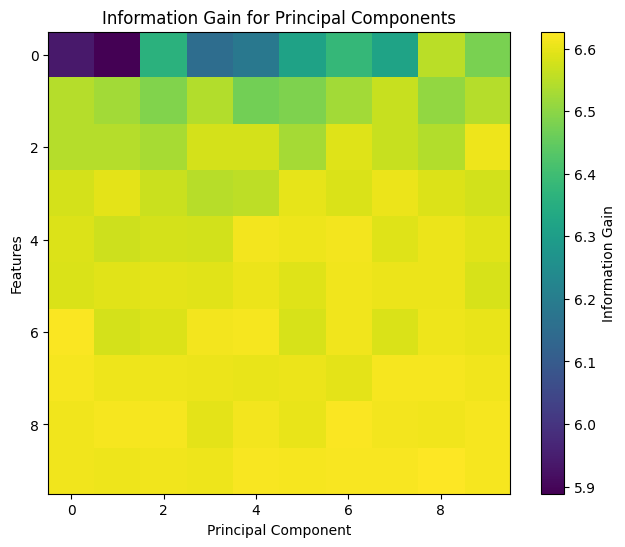

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
info_gains=information_gains(pca_df, pd.Series(y))
# Assuming 'info_gains' is your 1D Series of information gains
# Reshape it into a 2D array (size depends on the number of principal components)
info_gain_array = info_gains.values.reshape(10, 10)

# Create a heatmap to visualize the information gain
plt.figure(figsize=(8, 6))
plt.imshow(info_gain_array, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Information Gain')
plt.title('Information Gain for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Features')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Sample N random samples from the dataset
N = 100
X_sampled, _, y_sampled, _ = train_test_split(pca_df, y, train_size=N, stratify=y, random_state=42)

# Split the sampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Evaluate the classifier on the test data
accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)

print(f"SKLEARN Accuracy on test data: {accuracy_test:.2f}")
print(f"SKLEARN Accuracy on train data: {accuracy_train:.2f}")


SKLEARN Accuracy on test data: 0.55
SKLEARN Accuracy on train data: 1.00


In [ ]:
# Create and train the decision tree
dt = Node(depth=0,max_depth=10)
dt.fit(pd.DataFrame(X_train), pd.Series(y_train))

In [ ]:
import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["info_gain"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(
                    best_split["feature_index"],
                    best_split["threshold"],
                    left_subtree,
                    right_subtree,
                    best_split["info_gain"]
                )

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        return gain

    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)

    def fit(self, X, Y):
        dataset = np.concatenate((X, Y.reshape(-1, 1)), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions

    def make_prediction(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


In [18]:
# Create and train the decision tree
dt = DecisionTreeClassifier(min_samples_split=2, max_depth=10)
X_train_array = X_train.to_numpy()  # Convert DataFrame to a NumPy array
y_train_array = y_train.to_numpy()  # Convert Series to a NumPy array
dt.fit(X_train_array, y_train_array)

# Evaluate the decision tree on the test set
correct_predictions = 0
total_predictions = len(y_test)

for i in range(total_predictions):
    sample_data = X_test.iloc[i].to_numpy()  # Convert DataFrame row to a NumPy array
    predicted_class = dt.predict([sample_data])[0]  # Predict using the decision tree
    if predicted_class == y_test.iloc[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions

In [20]:


print("Accuracy:", accuracy)


Accuracy: 0.6
